Global Power Plant Database


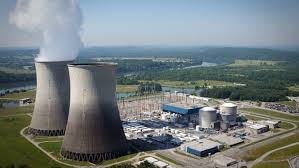



Project Description
The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

Key attributes of the database


The database includes the following indicators:



country (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
country_long (text): longer form of the country designation
name (text): name or title of the power plant, generally in Romanized form
gppd_idnr (text): 10 or 12 character identifier for the power plant
capacity_mw (number): electrical generating capacity in megawatts
latitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
longitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
primary_fuel (text): energy source used in primary electricity generation or export
other_fuel1 (text): energy source used in electricity generation or export
other_fuel2 (text): energy source used in electricity generation or export
other_fuel3 (text): energy source used in electricity generation or export
owner (text): majority shareholder of the power plant, generally in Romanized form
source (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
url (text): web document corresponding to the source field
geolocation_source (text): attribution for geolocation information
wepp_id (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
year_of_capacity_data (number): year the capacity information was reported
generation_gwh_2013 (number): electricity generation in gigawatt-hours reported for the year 2013
generation_gwh_2014 (number): electricity generation in gigawatt-hours reported for the year 2014
generation_gwh_2015 (number): electricity generation in gigawatt-hours reported for the year 2015
generation_gwh_2016 (number): electricity generation in gigawatt-hours reported for the year 2016
generation_gwh_2017 (number): electricity generation in gigawatt-hours reported for the year 2017
generation_gwh_2018 (number): electricity generation in gigawatt-hours reported for the year 2018
generation_gwh_2019 (number): electricity generation in gigawatt-hours reported for the year 2019
generation_data_source (text): attribution for the reported generation information
estimated_generation_gwh_2013 (number): estimated electricity generation in gigawatt-hours for the year 2013
estimated_generation_gwh_2014 (number): estimated electricity generation in gigawatt-hours for the year 2014
estimated_generation_gwh_2015 (number): estimated electricity generation in gigawatt-hours for the year 2015
estimated_generation_gwh_2016 (number): estimated electricity generation in gigawatt-hours for the year 2016
estimated_generation_gwh_2017 (number): estimated electricity generation in gigawatt-hours for the year 2017
'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
estimated_generation_note_2014 (text): label of the model/method used to estimate generation for the year 2014
estimated_generation_note_2015 (text): label of the model/method used to estimate generation for the year 2015
estimated_generation_note_2016 (text): label of the model/method used to estimate generation for the year 2016
estimated_generation_note_2017 (text): label of the model/method used to estimate generation for the year 2017
Fuel Type Aggregation
We define the "Fuel Type" attribute of our database based on common fuel categories.  Prediction :  Make two prediction  1) Primary Fuel     2) capacity_mw




In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [24]:
import pandas as pd

url8 = "https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Global%20Power%20Plant%20Database/database_AUS.csv"
"https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Global%20Power%20Plant%20Database/database_IND.csv"
"https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Global%20Power%20Plant%20Database/database_USA.csv"

df1 = pd.read_csv(url8, sep=',')
df1.head()


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,AUS,Australia,Adelaide Airport,AUS0000433,0.11,-34.9387,138.5377,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AUS,Australia,Adelaide Showgrounds,AUS0000432,1.00,-34.9453,138.5882,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AUS,Australia,Albany Wind Farm,AUS0000065,21.60,-35.0641,117.7977,Wind,NaN,NaN,...,2019.0,89.595278,102.642778,96.555556,95.872778,85.900278,92.682222,NaN,Australia Clean Energy Regulator,NaN
3,AUS,Australia,Alice Springs Airport,AUS0000469,0.24,-23.7966,133.8971,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AUS,Australia,Amcor Gawler,AUS0000231,4.00,-34.5509,138.7659,Oil,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


1. EDA Exploratory Data Analysis
1.1 First view


In [25]:
df1.head()


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,AUS,Australia,Adelaide Airport,AUS0000433,0.11,-34.9387,138.5377,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AUS,Australia,Adelaide Showgrounds,AUS0000432,1.00,-34.9453,138.5882,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AUS,Australia,Albany Wind Farm,AUS0000065,21.60,-35.0641,117.7977,Wind,NaN,NaN,...,2019.0,89.595278,102.642778,96.555556,95.872778,85.900278,92.682222,NaN,Australia Clean Energy Regulator,NaN
3,AUS,Australia,Alice Springs Airport,AUS0000469,0.24,-23.7966,133.8971,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AUS,Australia,Amcor Gawler,AUS0000231,4.00,-34.5509,138.7659,Oil,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df1.tail()


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
507,AUS,Australia,Yarrawonga,AUS0000101,9.00,-36.0094,145.9995,Hydro,NaN,NaN,...,2019.0,38.216111,44.224722,50.183889,46.035278,31.444722,37.317778,NaN,Australia Clean Energy Regulator,NaN
508,AUS,Australia,Yarwun,AUS0000173,154.00,-23.8306,151.1519,Gas,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
509,AUS,Australia,Yuendumu,AUS0000465,0.24,-22.2426,131.7931,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,5.216667,5.176944,5.341111,NaN,Australia Clean Energy Regulator,NaN
510,AUS,Australia,Yulara,AUS0000257,10.95,-25.2323,130.9912,Gas,NaN,NaN,...,2019.0,21.947500,22.775000,24.086111,23.043889,19.885000,19.558056,NaN,Australia Clean Energy Regulator,NaN
511,AUS,Australia,Yurralyi Maya (Karratha Seven Mile),AUS0000218,180.00,-20.7620,116.7420,Gas,NaN,NaN,...,2019.0,NaN,NaN,977.226944,945.557778,756.219167,597.411667,NaN,Australia Clean Energy Regulator,NaN


In [27]:
df1.shape

print(f"The rows and columns in the dataset: {df1.shape}")
print(f"\nThe column headers in the dataset: {df1.columns}")


The rows and columns in the dataset: (512, 27)

The column headers in the dataset: Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')


In [28]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   512 non-null    object 
 1   country_long              512 non-null    object 
 2   name                      512 non-null    object 
 3   gppd_idnr                 512 non-null    object 
 4   capacity_mw               506 non-null    float64
 5   latitude                  512 non-null    float64
 6   longitude                 512 non-null    float64
 7   primary_fuel              512 non-null    object 
 8   other_fuel1               0 non-null      float64
 9   other_fuel2               0 non-null      float64
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        292 non-null    float64
 12  owner                     495 non-null    object 
 13  source                    512 non-null    object 
 14  url       

1.2 Missing values

1.2.1
Inspecting the dataset


In [75]:
missing_value2 = df1.isnull().sum().to_frame("Null values")
missing_value2 ["% of missing"] = round(missing_value2['Null values'] / len(df1) * 100,3)

missing_value2



,Null values,% of missing
country,0,0.000
country_long,0,0.000
name,0,0.000
gppd_idnr,0,0.000
capacity_mw,6,1.172
latitude,0,0.000
longitude,0,0.000
primary_fuel,0,0.000
other_fuel2,512,100.000
other_fuel3,512,100.000


1.2.2

Columns with no information


In [36]:
missing_value2[missing_value['% of missing'] >= 100]


,Null values,% of missing
other_fuel1,512,100.0
other_fuel2,512,100.0
other_fuel3,512,100.0
wepp_id,512,100.0
generation_gwh_2019,512,100.0
estimated_generation_gwh,512,100.0


In [44]:
coln_to_drop = missing_value2[missing_value2['% of missing'] > 100].index.to_list()


df1.drop(coln_to_drop, axis=1, inplace=True)
df1.head(3)


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,AUS,Australia,Adelaide Airport,AUS0000433,0.11,-34.9387,138.5377,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AUS,Australia,Adelaide Showgrounds,AUS0000432,1.00,-34.9453,138.5882,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AUS,Australia,Albany Wind Farm,AUS0000065,21.60,-35.0641,117.7977,Wind,NaN,NaN,...,2019.0,89.595278,102.642778,96.555556,95.872778,85.900278,92.682222,NaN,Australia Clean Energy Regulator,NaN


In [43]:
missing_value2[(missing_value2['% of missing'] > 30) & (missing_value2['% of missing'] <=100)].sort_values(by='% of missing',ascending=False)


,Null values,% of missing
other_fuel1,512,100.00
other_fuel2,512,100.00
other_fuel3,512,100.00
wepp_id,512,100.00
generation_gwh_2019,512,100.00
estimated_generation_gwh,512,100.00
generation_gwh_2013,259,50.59
generation_gwh_2014,235,45.90
generation_gwh_2015,222,43.36
commissioning_year,220,42.97



1.2.3

other_fluel1 feature


In [46]:
df1.other_fuel1.unique()


array([nan])

In [6]:
import pandas as pd

df1 = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Global%20Power%20Plant%20Database/database_AUS.csv')

df1.other_fuel1.value_counts(normalize=True, dropna=False)


other_fuel1
NaN    1.0
Name: proportion, dtype: float64

In [7]:
df1.other_fuel1.value_counts(dropna=False)


other_fuel1
NaN    512
Name: count, dtype: int64

1.2.4


 Owner feature


In [45]:
missing_value2[(missing_value2['% of missing'] > 0) & (missing_value2['% of missing'] < 30)]


,Null values,% of missing
capacity_mw,6,1.17
owner,17,3.32
year_of_capacity_data,4,0.78


In [11]:
print(f"Column owner has {df1.owner.nunique()} unique value")


Column owner has 219 unique value


In [10]:
df1.owner.value_counts(dropna=False)


owner
Hydro-Electric Corporation (Tasmania)                     31
AGL Energy Pty Ltd                                        31
Verve Energy                                              25
NaN                                                       17
Energy Developments Ltd                                   14
                                                          ..
Hazelwood Power                                            1
Waste Gas Resources                                        1
Solar Systems                                              1
Industry Funds Management Nominees Ltd Ecogen Holdings     1
Rio Tinto Australia - Yarwun Pty Ltd                       1
Name: count, Length: 220, dtype: int64

In [12]:
print( f"The most frequent values in owner are: \n {df1.owner.mode()}")


The most frequent values in owner are: 
 0                       AGL Energy Pty Ltd
1    Hydro-Electric Corporation (Tasmania)
Name: owner, dtype: object


In [ ]:
1.2.5

 Dropping columns: other_fluel1 & Owner



1.2.6

Rows with no Information



In [76]:
missing_value2 = df1.isnull().sum().to_frame("Null values")
missing_value2 ["% of missing"] = round(missing_value2['Null values'] / len(df1) * 100,3)

missing_value2



,Null values,% of missing
country,0,0.000
country_long,0,0.000
name,0,0.000
gppd_idnr,0,0.000
capacity_mw,6,1.172
latitude,0,0.000
longitude,0,0.000
primary_fuel,0,0.000
other_fuel2,512,100.000
other_fuel3,512,100.000


In [83]:
missing_value2[missing_value2['Null values'] > 0]



,Null values,% of missing
capacity_mw,6,1.172
other_fuel2,512,100.000
other_fuel3,512,100.000
commissioning_year,220,42.969
wepp_id,512,100.000
year_of_capacity_data,4,0.781
generation_gwh_2013,259,50.586
generation_gwh_2014,235,45.898
generation_gwh_2015,222,43.359
generation_gwh_2016,213,41.602


In [ ]:

missing_value2 = missing_value2.drop(coln_to_drop + ['other_fuel1','owner'])

missing_value2

In [90]:
missing_value2_coln = missing_value2.index.to_list()
mask = df1[missing_value2_coln].isnull().all(axis=1)

rows_with_all_missing = df1[mask]
print(f"Columns with missing values: {missing_value2_coln} \nNumber of rows with null values: {rows_with_all_missing.shape[0]}\n")
print("Rows with null values:")
rows_with_all_missing



Columns with missing values: ['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'other_fuel2', 'other_fuel3', 'commissioning_year', 'source', 'url', 'geolocation_source', 'wepp_id', 'year_of_capacity_data', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'generation_gwh_2019', 'generation_data_source', 'estimated_generation_gwh'] 
Number of rows with null values: 0

Rows with null values:


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel2,other_fuel3,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh


In [91]:
df1 = df1[~mask]
print(f"The new dimension of the dataset is {df1.shape}")


The new dimension of the dataset is (512, 25)


1.3

 Features Analysis

1.3.1

 Unique values


In [93]:
information_df1 = df1.nunique().to_frame('No. of unique values')
information_df1['type'] = df1.dtypes.values
information_df1


,No. of unique values,type
country,1,object
country_long,1,object
name,512,object
gppd_idnr,512,object
capacity_mw,304,float64
latitude,507,float64
longitude,509,float64
primary_fuel,8,object
other_fuel2,0,float64
other_fuel3,0,float64


1.3.1.1

Primary Fuel unique values


In [94]:
coln = 'primary_fuel'
print(f"Feature {coln}:\n{df1[coln].value_counts()}")
print(f"Unique values: {sorted(df1[coln].unique())}")
print(f"# unique values: {df1[coln].nunique()}\n")


Feature primary_fuel:
primary_fuel
Gas        140
Wind        76
Hydro       76
Solar       62
Oil         55
Waste       50
Coal        28
Biomass     25
Name: count, dtype: int64
Unique values: ['Biomass', 'Coal', 'Gas', 'Hydro', 'Oil', 'Solar', 'Waste', 'Wind']
# unique values: 8



1.3.1.2

Capacity unique values


In [96]:
coln = 'capacity_mw'
print(f"Feature {coln}:\n{df1[coln].value_counts()}")
print(f"# unique values: {df1[coln].nunique()}\n")


Feature capacity_mw:
capacity_mw
1.00      18
30.00      9
20.00      8
1.30       7
0.80       7
          ..
228.00     1
0.02       1
34.70      1
260.90     1
10.95      1
Name: count, Length: 304, dtype: int64
# unique values: 304



1.3.1.3

Columns with only 1 unique value


In [100]:
for coln in ['country', 'country_long', 'year_of_capacity_data', 'generation_data_source']:
    print(f"Feature {coln}:\n{df1[coln].value_counts()}")
    print(f"Unique values: {df1[coln].unique()}")
    print(f"unique values: {df1[coln].nunique()}\n")


Feature country:
country
AUS    512
Name: count, dtype: int64
Unique values: ['AUS']
unique values: 1

Feature country_long:
country_long
Australia    512
Name: count, dtype: int64
Unique values: ['Australia']
unique values: 1

Feature year_of_capacity_data:
year_of_capacity_data
2019.0    508
Name: count, dtype: int64
Unique values: [2019.   nan]
unique values: 1

Feature generation_data_source:
generation_data_source
Australia Clean Energy Regulator    312
Name: count, dtype: int64
Unique values: [nan 'Australia Clean Energy Regulator']
unique values: 1



1.3.1.4

Dropping columns


In [102]:
coln_to_drop = ['name', 'gppd_idnr',
                   'country', 'country_long', 'year_of_capacity_data', 'generation_data_source',]
coln_to_drop


['name',
 'gppd_idnr',
 'country',
 'country_long',
 'year_of_capacity_data',
 'generation_data_source']

In [103]:
df1.drop(coln_to_drop, axis=1, inplace=True)


In [104]:
df1.shape
print(f"The rows and columns in the dataset: {df1.shape}")
print(f"\nThe column headers in the dataset: {df1.columns}")


The rows and columns in the dataset: (512, 19)

The column headers in the dataset: Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'source', 'url',
       'geolocation_source', 'wepp_id', 'generation_gwh_2013',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018', 'generation_gwh_2019',
       'estimated_generation_gwh'],
      dtype='object')


1.3.1.6


Independent variables unique values


In [106]:
categorical_coln = []
numerical_coln = []

for i in df1.columns:
    if df1.dtypes[i] == 'object':
        categorical_coln.append(i)
    else:
        numerical_coln.append(i)
print(f"Categorical Coln: {categorical_coln}")
print(f"Numerical Coln: {numerical_coln}")


Categorical Coln: ['primary_fuel', 'source', 'url', 'geolocation_source']
Numerical Coln: ['capacity_mw', 'latitude', 'longitude', 'other_fuel2', 'other_fuel3', 'commissioning_year', 'wepp_id', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'generation_gwh_2019', 'estimated_generation_gwh']


In [107]:
categorical_coln.remove('primary_fuel')
categorical_coln


['source', 'url', 'geolocation_source']

In [108]:
for coln in categorical_coln:
    print(f"Feature {coln}:\n{df1[coln].value_counts(dropna=False)}")
    print(f"unique values: {df1[coln].nunique()}\n")


Feature source:
source
Australian Renewable Energy Mapping Infrastructure    512
Name: count, dtype: int64
unique values: 1

Feature url:
url
https://www.nationalmap.gov.au/    512
Name: count, dtype: int64
unique values: 1

Feature geolocation_source:
geolocation_source
Australian Renewable Energy Mapping Infrastructure    512
Name: count, dtype: int64
unique values: 1



In [109]:
numerical_coln.remove('capacity_mw')
numerical_coln


['latitude',
 'longitude',
 'other_fuel2',
 'other_fuel3',
 'commissioning_year',
 'wepp_id',
 'generation_gwh_2013',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'generation_gwh_2018',
 'generation_gwh_2019',
 'estimated_generation_gwh']

In [110]:
for coln in numerical_coln:
    print(f"Feature {coln}:\n{df1[coln].value_counts()}")
    print(f"unique values: {df1[coln].nunique()}\n")


Feature latitude:
latitude
-35.1104    2
-38.2536    2
-27.1169    2
-27.7334    2
-24.3449    2
           ..
-38.0535    1
-36.3501    1
-34.6977    1
-34.6149    1
-20.7620    1
Name: count, Length: 507, dtype: int64
unique values: 507

Feature longitude:
longitude
150.8942    2
141.5430    2
146.8011    2
138.5377    1
115.9469    1
           ..
138.7928    1
145.2699    1
148.4135    1
149.3861    1
116.7420    1
Name: count, Length: 509, dtype: int64
unique values: 509

Feature other_fuel2:
Series([], Name: count, dtype: int64)
unique values: 0

Feature other_fuel3:
Series([], Name: count, dtype: int64)
unique values: 0

Feature commissioning_year:
commissioning_year
2015.0    19
2012.0    17
2011.0    12
2010.0    11
2013.0    11
          ..
1986.0     1
1955.0     1
1964.0     1
1959.0     1
1990.0     1
Name: count, Length: 61, dtype: int64
unique values: 61

Feature wepp_id:
Series([], Name: count, dtype: int64)
unique values: 0

Feature generation_gwh_2013:
generation_gwh_

1.3.2

 Imputing Missing values


In [112]:
missing_value2 = df1.isnull().sum().to_frame("Null values")
missing_value2["% of missing"] = round(missing_value2['Null values'] / len(df1) * 100,3)

missing_value2 = missing_value2[missing_value2['Null values'] > 0]
missing_value2


,Null values,% of missing
capacity_mw,6,1.172
other_fuel2,512,100.000
other_fuel3,512,100.000
commissioning_year,220,42.969
wepp_id,512,100.000
generation_gwh_2013,259,50.586
generation_gwh_2014,235,45.898
generation_gwh_2015,222,43.359
generation_gwh_2016,213,41.602
generation_gwh_2017,219,42.773


1.3.2.1


Commissioning year missing values


In [113]:
df1.commissioning_year.value_counts()


commissioning_year
2015.0    19
2012.0    17
2011.0    12
2010.0    11
2013.0    11
          ..
1986.0     1
1955.0     1
1964.0     1
1959.0     1
1990.0     1
Name: count, Length: 61, dtype: int64

In [114]:
coln = 'commissioning_year'
print(f"Missing values in {coln}: {df1[coln].isnull().sum()}")
mode_value = df1[coln].mode()[0]
print(f"Impute the missing values with the mode {mode_value}")
df1[coln].fillna(mode_value, inplace=True)
print(f"Missing values in {coln}: {df1[coln].isnull().sum()}")

Missing values in commissioning_year: 220
Impute the missing values with the mode 2015.0
Missing values in commissioning_year: 0


1.3.2.2

 Generation gwh missing values


In [115]:
generation_coln = ['generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']

df1[generation_coln].skew()


generation_gwh_2014    4.773444
generation_gwh_2015    4.982903
generation_gwh_2016    5.108968
generation_gwh_2017    4.721551
generation_gwh_2018    5.059693
dtype: float64

In [116]:
for coln in generation_coln:
    print(f"Column={coln} Mode={df1[coln].mode()[0]} Median(60%)={df1[coln].median():.7f}  Mean={df1[coln].mean():.7f}")


Column=generation_gwh_2014 Mode=157.55825 Median(60%)=107.3525000  Mean=731.3756027
Column=generation_gwh_2015 Mode=152.1952 Median(60%)=93.0633333  Mean=719.4759526
Column=generation_gwh_2016 Mode=61.42135 Median(60%)=92.1047222  Mean=698.6043909
Column=generation_gwh_2017 Mode=89.6296 Median(60%)=89.6296000  Mean=729.2271859
Column=generation_gwh_2018 Mode=48.32715 Median(60%)=82.5026389  Mean=707.5079048


In [117]:
for coln in generation_coln:
    print(f"Missing values in {coln}: {df1[coln].isnull().sum()}")
    impute_value = round(df1[coln].median(),6)
    print(f"Impute the missing values in {coln} with the median: {impute_value}")
    df1[coln].fillna(impute_value, inplace=True)
    print(f"Missing values in {coln}: {df1[coln].isnull().sum()}\n")


Missing values in generation_gwh_2014: 235
Impute the missing values in generation_gwh_2014 with the median: 107.3525
Missing values in generation_gwh_2014: 0

Missing values in generation_gwh_2015: 222
Impute the missing values in generation_gwh_2015 with the median: 93.063333
Missing values in generation_gwh_2015: 0

Missing values in generation_gwh_2016: 213
Impute the missing values in generation_gwh_2016 with the median: 92.104722
Missing values in generation_gwh_2016: 0

Missing values in generation_gwh_2017: 219
Impute the missing values in generation_gwh_2017 with the median: 89.6296
Missing values in generation_gwh_2017: 0

Missing values in generation_gwh_2018: 212
Impute the missing values in generation_gwh_2018 with the median: 82.502639
Missing values in generation_gwh_2018: 0



1.3.2.3

Geolocation Source missing values


In [118]:
df1.geolocation_source.value_counts(dropna=False)


geolocation_source
Australian Renewable Energy Mapping Infrastructure    512
Name: count, dtype: int64

In [119]:
coln = 'geolocation_source'
print(f"Missing values in {coln}: {df1[coln].isnull().sum()}")
mode_value = df1[coln].mode()[0]
print(f"Impute the missing values with the mode {mode_value}")
df1[coln].fillna(mode_value, inplace=True)

print(f"Missing values in {coln}: {df1[coln].isnull().sum()}")


Missing values in geolocation_source: 0
Impute the missing values with the mode Australian Renewable Energy Mapping Infrastructure
Missing values in geolocation_source: 0


In [120]:
df1[df1['latitude'].isna() | df1['longitude'].isna() ].shape


(0, 19)

In [122]:
df1_new = df1.dropna(subset=['latitude','longitude'])

print(f"{df1.shape[0] - df1_new.shape[0]} rows with missing values were deleted.")
print(f"This represent {round((df1.shape[0] - df1_new.shape[0]) / df1.shape[0] *100, 2)}% of the data.")
print(f"In the new dataset there are {df1_new.shape[0]} rows and {df1.shape[1]} columns.")
df1 = df1_new.copy()


0 rows with missing values were deleted.
This represent 0.0% of the data.
In the new dataset there are 512 rows and 19 columns.


1.3.2.5

Last check for missing values


In [123]:
df1.isnull().sum().sum()


2825

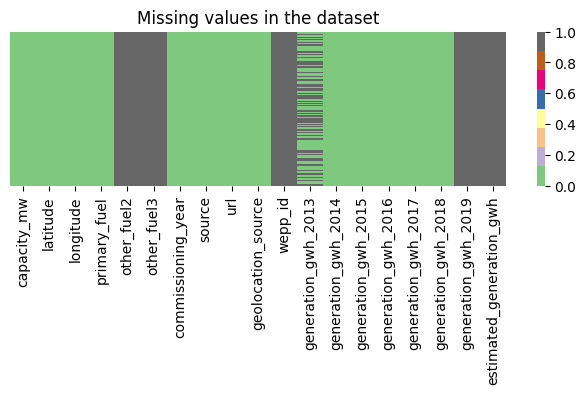

In [124]:
plt.figure(figsize=(8,2))
sns.heatmap(df1.isnull(), yticklabels=False, cmap='Accent')
plt.title('Missing values in the dataset', fontsize=12);


In [125]:
df1.shape


(512, 19)

1.3.3

Summary statistics of the numerical and non-numerical variables


In [126]:
stats1 = df1.describe()
stats1

,capacity_mw,latitude,longitude,other_fuel2,other_fuel3,commissioning_year,wepp_id,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
count,506.000000,512.000000,512.000000,0.0,0.0,512.000000,0.0,253.000000,512.000000,512.000000,512.000000,512.000000,512.000000,0.0,0.0
mean,127.380881,-30.862719,138.913013,NaN,NaN,2005.265625,NaN,778.488685,444.958749,447.867356,446.291052,455.649312,448.716662,NaN,NaN
std,291.227666,7.238762,12.820301,NaN,NaN,14.876522,NaN,2251.906541,1551.770584,1688.248153,1707.298301,1714.427046,1740.520858,NaN,NaN
min,0.010000,-42.888300,113.534000,NaN,NaN,1949.000000,NaN,0.003333,0.005000,0.000000,0.001667,0.021944,0.005000,NaN,NaN
25%,3.225000,-36.323000,129.337475,NaN,NaN,1999.000000,NaN,17.232778,93.392222,73.556806,61.421350,70.972639,53.111528,NaN,NaN
50%,30.000000,-32.948800,144.967400,NaN,NaN,2015.000000,NaN,100.758889,107.352500,93.063333,92.104722,89.629600,82.502639,NaN,NaN
75%,110.750000,-25.513875,148.595875,NaN,NaN,2015.000000,NaN,325.435278,141.559931,129.761528,131.004444,134.557014,133.531111,NaN,NaN
max,2640.000000,-12.188900,153.434100,NaN,NaN,2018.000000,NaN,16593.380000,16099.330280,17090.680000,17914.930000,15944.580000,17186.143890,NaN,NaN


In [133]:
(stats1.loc['mean',:] - stats1.loc['75%',:]).sort_values(ascending=False)


generation_gwh_2013         453.053408
generation_gwh_2017         321.092298
generation_gwh_2015         318.105828
generation_gwh_2016         315.286608
generation_gwh_2018         315.185551
generation_gwh_2014         303.398818
capacity_mw                  16.630881
latitude                     -5.348844
longitude                    -9.682862
commissioning_year           -9.734375
other_fuel2                        NaN
other_fuel3                        NaN
wepp_id                            NaN
generation_gwh_2019                NaN
estimated_generation_gwh           NaN
dtype: float64

In [134]:
(stats1.loc['max',:] - (stats1.loc['mean',:] + 6 * stats1.loc['std',:] ) ).sort_values(ascending=False)


generation_gwh_2016         7224.849140
generation_gwh_2015         6513.323727
generation_gwh_2014         6343.748027
generation_gwh_2018         6294.302077
generation_gwh_2017         5202.368414
generation_gwh_2013         2303.452069
capacity_mw                  765.253120
latitude                     -24.758751
longitude                    -62.400717
commissioning_year           -76.524758
other_fuel2                         NaN
other_fuel3                         NaN
wepp_id                             NaN
generation_gwh_2019                 NaN
estimated_generation_gwh            NaN
dtype: float64

In [ ]:
from google.colab import drive
drive.mount('/content/drive')